If you have not gone throuwh self attention please visit first: <link>

Original Paper : https://arxiv.org/pdf/1706.03762


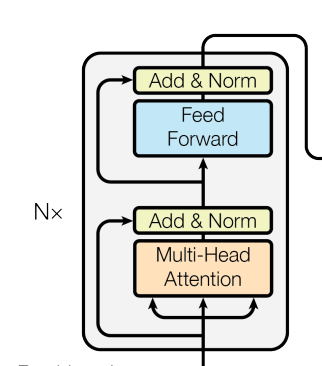



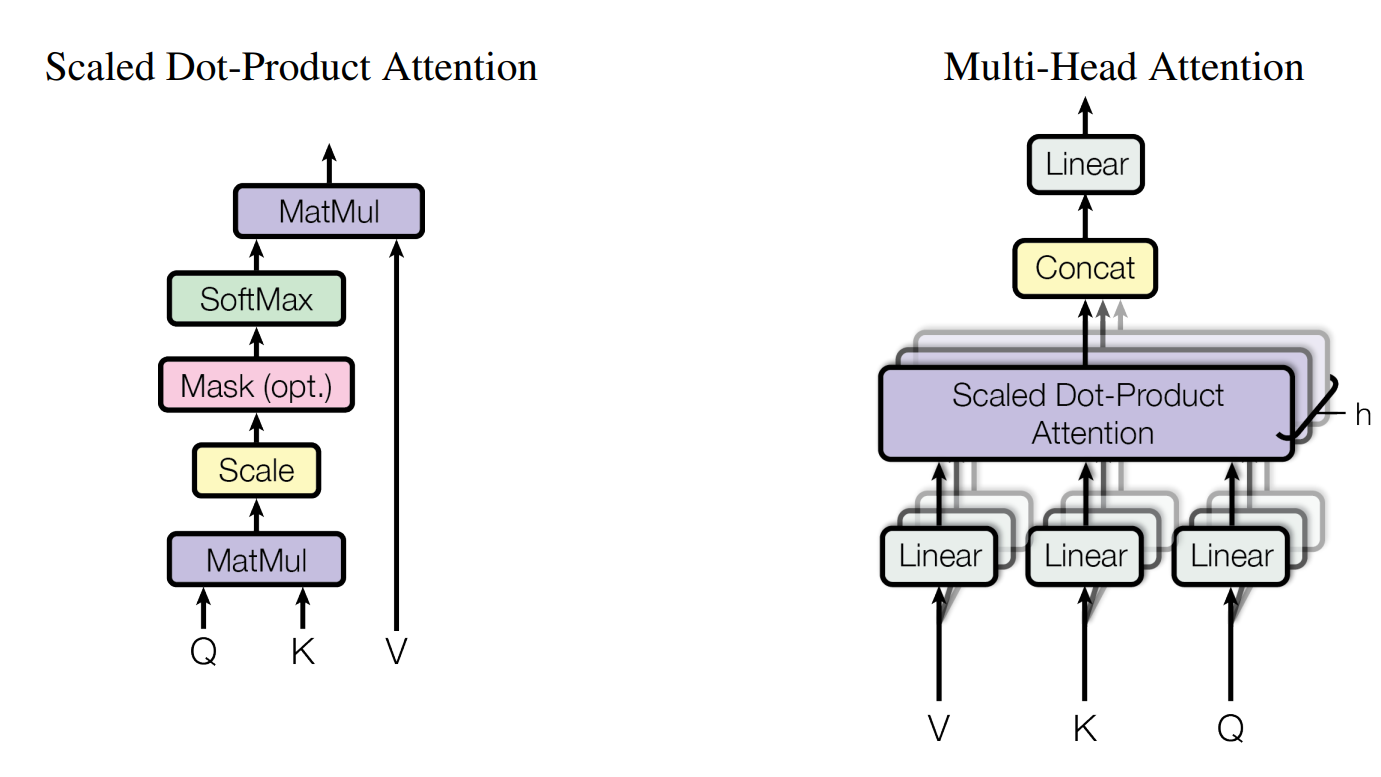

## Why Multi-Head Attention?

While Self-Attention is powerful, a single attention mechanism has a major limitation: it can only focus on one type of relationship at a time.

Self-attention allows each word in a sentence to interact with every other word and compute contextual relationships. However, when using a single attention mechanism, the model produces only one set of attention scores. This means the model captures only one type of relationship between words in a sentence.

Language, however, is complex. Words can be related in multiple ways at the same time — syntactically, semantically, or contextually. A single attention head may focus on only one such relationship, which limits the richness of understanding.

Multi-head attention solves this problem by running multiple self-attention mechanisms in parallel. Each head learns to focus on different types of relationships or patterns in the input sequence. The outputs from all heads are then combined, allowing the model to build a more comprehensive representation of the input.

Example :  The boy who was playing football is tired

Different attention heads might focus on:
* Head 1 (Grammatical Perspective)
Connects boy with is tired to understand subject-verb relationship.

* Head 2 (Contextual Description Perspective)
Links boy with playing football to understand which boy is being described.

* Head 3 (Action Understanding Perspective)
Focuses on the relationship between playing and football.


So Multi-head attention is like consulting multiple experts, each specializing in different aspects of language. Combining their opinions leads to better understanding and better predictions.


From Paper

"*Instead of performing a single attention function with $d_{model}$-dimensional keys, values and queries,
we found it beneficial to linearly project the queries, keys and values h times with different, learned
linear projections to $d_k$, $d_k$ and $d_v$ dimensions, respectively. On each of these projected versions of
queries, keys and values we then perform the attention function in parallel, yielding $d_v$ dimensional output values. These are concatenated and once again projected, resulting in the final values. Multi-head attention allows the model to jointly attend to information from different representation
subspaces at different positions. With a single attention head, averaging inhibits this.*

$$\text{MultiHead}(Q, K, V) = \text{Concat}(\text{head}_1, \dots, \text{head}_h)W^O$$

$$\text{where head}_i = \text{Attention}(QW_i^Q, KW_i^K, VW_i^V)$$

*Where the projections are parameter matrices $W_Q^i \in \mathbb{R}^{d_{model} \times d_k}$ , $W_K^i \in \mathbb{R}^{d_{model} \times d_k}$ , $W_V^i \in \mathbb{R}^{d_{model} \times d_v}$ , $W_O \in \mathbb{R}^{hd_v \times d_{model}}$*

*In this work we employ $h$ = 8 parallel attention layers, or heads. For each of these we use
$d_k$ = $d_v$ = $d_{model}$/$h$ = 64. Due to the reduced dimension of each head, the total computational cost
is similar to that of single-head attention with full dimensionality*


Explanation : 
* $d_{model}$ (The Model Dimension) - This is the total size of the word embedding
*  $d_k$ (The Key/Query Dimension) - In Multi-Head Attention, we split the big $d_{model}$ into smaller pieces. $d_k$ is the size of the Query and Key vectors for a single head. The Formula:  $d_k = d_{model} / h$ (where $h$ is the number of heads).
In original paper:
    * $d_{model} = 512$
    * $h$=8 
    * $d_k = 64$.

* $d_v$ (The Value Dimension) - Note: It needs not to be = $d_k$ 


The paper states that instead of having a single attention block with Q, K, and V vectors of  $d_{model}$ dimensions, it is better to have multiple heads with smaller-dimensional query, key, and value vectors. By doing this, we can capture multiple perspectives of the sequence, while keeping the total computational cost similar to that of single-head attention with full dimensionality.


And at the end we have 8 different output vectors. We don't want 8 separate answers; we want one unified contextual embedding. So we concate these vectors and to find out which context is imp for us we do the Linear Projection ($W^O$) : we multiply this long concatenated vector by a final weight matrix ($W^O$) to bring it back to our original $d_{model}$ size.
